In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [133]:
# Load the dataset
data = pd.read_csv("C:\\Users\\vamsi\\Downloads\\maternal-mortality.csv")


In [134]:
data.head()

,Entity,Code,Year,Maternal mortality ratio
0,Afghanistan,AFG,1985,1910.3416
1,Afghanistan,AFG,1986,1602.9429
2,Afghanistan,AFG,1987,1586.7214
3,Afghanistan,AFG,1988,1413.9326
4,Afghanistan,AFG,1989,1382.7299


In [163]:
# Summary function for descriptive statistics and correlations
def dataset_summary(data):
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
# Summary statistics
    summary_stats = numeric_data.describe()
    print("Data Summary:\n", summary_stats)
# Correlation matrix
    correlation_matrix = numeric_data.corr()
    print("\nCorrelation Matrix:\n", correlation_matrix)
    return summary_stats, correlation_matrix
summary_stats, correlation_matrix = dataset_summary(data)

Data Summary:
               Year  Maternal mortality ratio
count  9264.000000               9264.000000
mean   1986.492552                257.753933
std      39.998474                386.571965
min    1751.000000                  1.044703
25%    1985.000000                 23.429611
50%    1997.000000                 83.921540
75%    2009.000000                390.801773
max    2020.000000               6774.713000

Correlation Matrix:
                               Year  Maternal mortality ratio
Year                      1.000000                 -0.298551
Maternal mortality ratio -0.298551                  1.000000


In [136]:
# 1. Histogram of Maternal Mortality Ratio
def plot_histogram(data):
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Maternal mortality ratio'], bins=30, kde=True, color='purple')
    plt.title('Distribution of Maternal Mortality Ratios')
    plt.xlabel('Maternal Mortality Ratio')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    


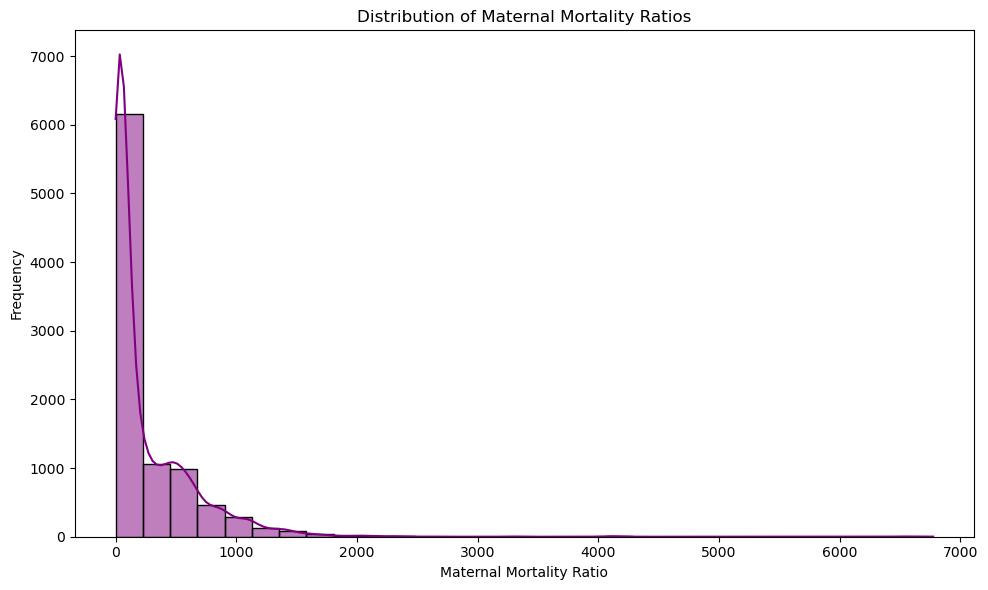

In [137]:
 plot_histogram(data)

In [138]:
# 2. Plot Pie chart of Average Maternal Mortality Ratio by Country
def plot_pie_chart(data, countries):
    # Filter the dataset for the selected countries
    sample_countries = data[data['Entity'].isin( ['Afghanistan', 'India', 'United States', 'Nigeria', 'Brazil'])]
    
    # Calculate the average maternal mortality ratio for each country
    avg_mortality_by_country = sample_countries.groupby('Entity')['Maternal mortality ratio'].mean()
    
    # Plot the pie chart
    plt.figure(figsize=(10, 6))
    plt.pie(avg_mortality_by_country, labels=avg_mortality_by_country.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.title('Average Maternal Mortality Ratio by Country')
    plt.tight_layout()
    plt.show()



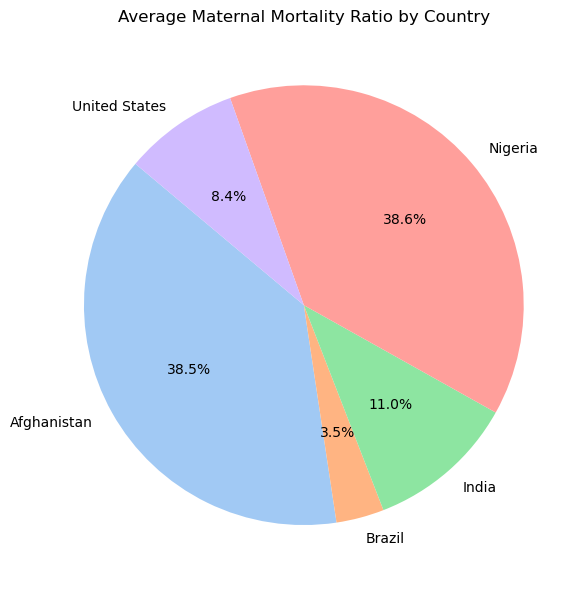

In [139]:
plot_pie_chart(data, countries)

In [157]:
# 3. Line Plot of Maternal Mortality Over Time for Specific Country
def plot_line(data, country="Nigeria"):
    country_data = data[data['Entity'] == country]
    plt.figure(figsize=(10, 6))
    plt.plot(country_data['Year'], country_data['Maternal mortality ratio'], marker='o', color='teal')
    plt.title(f'Maternal Mortality Ratio Over Time for {country}')
    plt.xlabel('Year')
    plt.ylabel('Maternal Mortality Ratio')
    plt.tight_layout()
    plt.show()


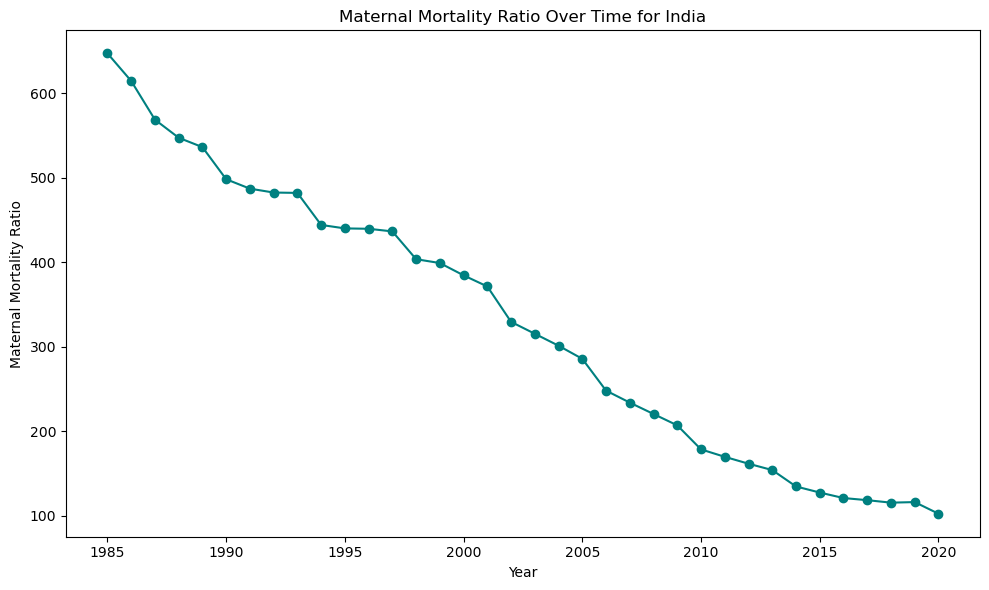

In [141]:
plot_line(data, country="India") 

In [142]:
# 4. Heatmap of Correlation Matrix
def plot_heatmap(data):
    plt.figure(figsize=(8, 6))
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()


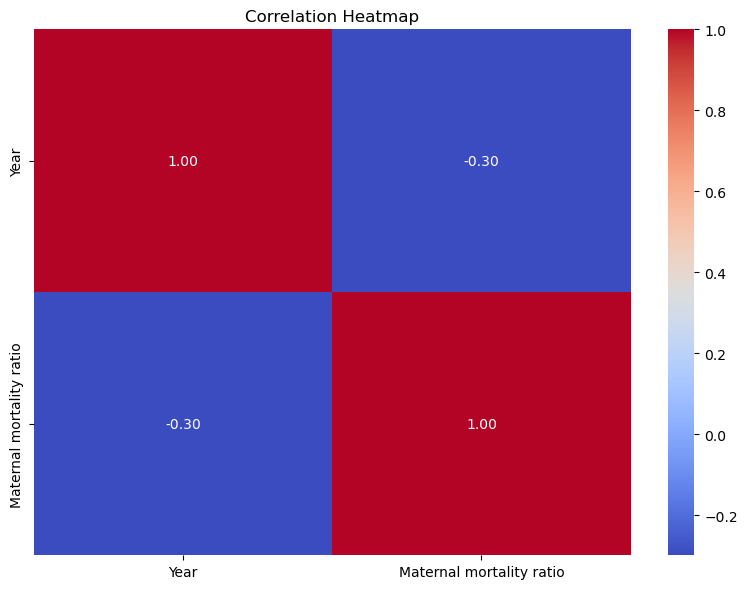

In [143]:
plot_heatmap(data)
